# Homework 3

This homework will explore linear regression and resampling techniques by analysing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [1]:
# git clone https://gitlab.com/wgms/glathida.git

### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [35]:
import numpy as np 
import pandas as pd
import xarray as xr
import geopandas
import rasterio
import rioxarray
import netCDF4 as nc
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [29]:
# solution
gladata = pd.read_csv("glacier.csv")

Dataset has 21 columns all showing various parameters of glacial data (thickness, length) as well as information about the database it was pulled from and 1013 rows, each corresponding to an individual glacier

**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [30]:
gladata = gladata[['mean_thickness', 'area', 'mean_slope', 'lat', 'lon']]
gladata = gladata.dropna()
gladata["log_thick"] = np.log10(gladata["mean_thickness"])
gladata["log_area"] = np.log10(gladata["area"])
gladata.head()

,mean_thickness,area,mean_slope,lat,lon,log_thick,log_area
32,58.0,2.90,0.0,48.75000,-121.83000,1.763428,0.462398
33,66.0,11.70,0.0,58.38000,-134.36000,1.819544,1.068186
34,56.0,5.15,0.0,50.06134,87.69741,1.748188,0.711807
35,86.0,2.84,0.0,50.04967,87.74552,1.934498,0.453318
36,90.0,5.95,0.0,50.08008,87.69025,1.954243,0.774517


## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [11]:
pio.renderers.default = 'notebook'
# try notebook, jupyterlab, png, vscode, iframe
fig = px.scatter_geo(gladata, lat="lat", lon="lon", color="log_thick")
fig.show()

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with  of the features (example: km). ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

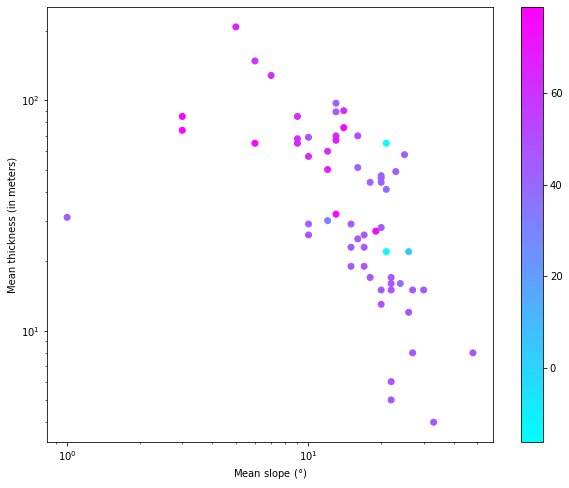

In [43]:
# Figure 1: slope vs mean thickness
plt.figure(figsize=(10,8))
plt.scatter(gladata.mean_slope, gladata.mean_thickness, c=gladata.lat, cmap='cool')
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar()
plt.grid=True
plt.xlabel('Mean slope ($\degree$)')
plt.ylabel('Mean thickness (in meters)')
plt.show()

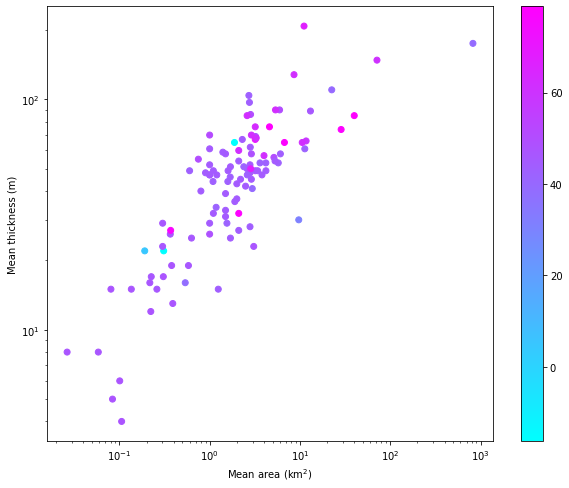

In [46]:
# Figure 2: area vs mean thickness
plt.figure(figsize=(10,8))
plt.scatter(gladata.area, gladata.mean_thickness, c=gladata.lat, cmap='cool')
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar()
plt.grid=True
plt.xlabel('Mean area (km$^2$)')
plt.ylabel('Mean thickness (m)')
plt.show()

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

In [47]:
px.scatter_3d(gladata, x='area', y='mean_slope', z='mean_thickness', color='lat', log_x=True, log_y=True)

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

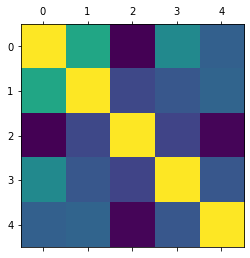

In [48]:
glacorr = gladata[['mean_thickness', 'area', 'mean_slope', 'lat', 'lon']].corr(method='pearson')
plt.matshow(glacorr)

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/). You can visualize the data by plotting data features against each other and explore visually data correlations.

<AxesSubplot:>

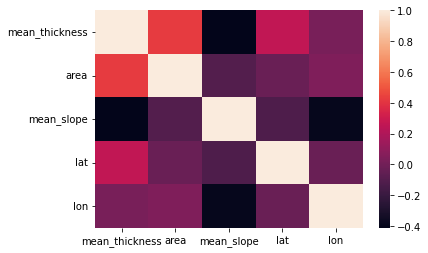

In [49]:
sns.heatmap(glacorr)

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

Thickness and area are positively correlated which makes sense because ice tends to spread out as it's compressed, making it difficult to have a small and thick glacier.

Slope is negatively correlated with both of the above, likely because glaciers with steeper slopes are likely to move faster and not pile up as much.

There's also a bizarre strong negative correlation between mean slope and longitude - maybe caused by steep glaciers in the Himalayas and shallow ones in the US? Idk.

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [111]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

log_area = gladata[["log_area"]]
slope = gladata[["mean_slope"]]
log_thick = gladata[["log_thick"]]
gladata.head()


,mean_thickness,area,mean_slope,lat,lon,log_thick,log_area
32,58.0,2.90,0.0,48.75000,-121.83000,1.763428,0.462398
33,66.0,11.70,0.0,58.38000,-134.36000,1.819544,1.068186
34,56.0,5.15,0.0,50.06134,87.69741,1.748188,0.711807
35,86.0,2.84,0.0,50.04967,87.74552,1.934498,0.453318
36,90.0,5.95,0.0,50.08008,87.69025,1.954243,0.774517


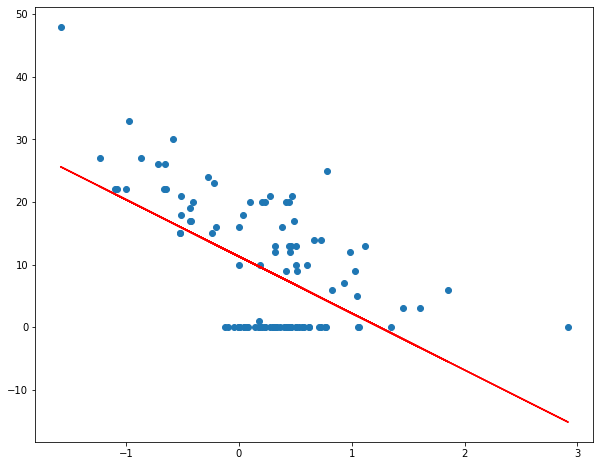

In [112]:
regmodel = LinearRegression()
regmodel.fit(log_area, slope)
modelpred = regmodel.predict(log_area)
fig = plt.figure(figsize=(10, 8))
plt.scatter(log_area, slope)
plt.plot(np.asarray(log_area), modelpred, color='red')

Make a plot of the data and the linear regression your performed

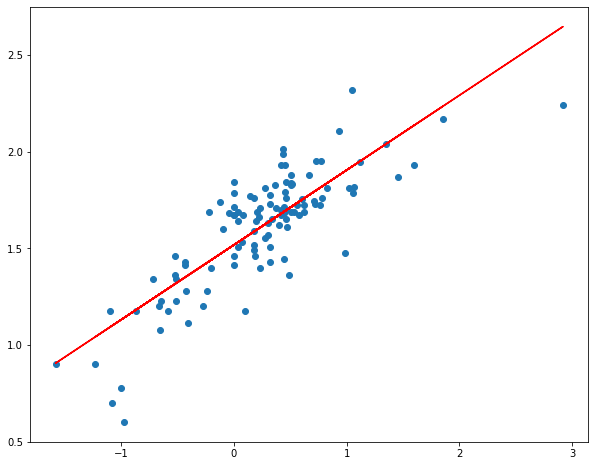

In [113]:
regmodel = LinearRegression()
regmodel.fit(log_area, log_thick)
modelpred = regmodel.predict(log_area)
fig = plt.figure(figsize=(10, 8))
plt.scatter(log_area, log_thick)
plt.plot(np.asarray(log_area), modelpred, color='red')

**Briefly comment on the quality of your fit and a linear regression (1 point)**

The regressions seem to fit more or less fine, I've seen worse in high-profile journals. Area vs thickness is an excellent fit but slope vs thickness has some heteroskedasticity. The data definitely needed to be log_transformed though, the raw data looked awful.

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

In [114]:
from sklearn.model_selection import LeaveOneOut
# solution
loo = LeaveOneOut()

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

In [ ]:
from sklearn.utils import resample
# solution

k=100


### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

In [ ]:
# solution
k=100